In [1]:
%matplotlib inline
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_excel('Classeur1.xlsx')

## TD CLASSIFICATION NON HIERARCHIQUE

On considère 6 individus (M i ) avec les coordonnées suivants (selon deux variables X et Y) :

In [3]:
df

,Colonne1,X,Y
0,M1,-2,3
1,M2,-2,1
2,M3,-2,-1
3,M4,2,-1
4,M5,2,1
5,M6,1,0


On veut mener une classification non hiérarchique en deux groupes en utilisant la méthode des
moyennes ou centres mobiles. On considère les individus M1 et M2 comme centres initiaux.

In [4]:
class Point:
    def __init__(self, x, y):
        self.__x = x
        self.__y = y

    def get_x(self):
        return self.__x

    def get_y(self):
        return self.__y

    def set_x(self, x):
        self.__x = x

    def set_y(self, y):
        self.__y = y
    def distance(self, p):
        d = math.sqrt( (self.get_x() - p.get_x() )**2 + (self.get_y() - p.get_y() )**2 )
        return d
    def moyenne(self, points):
        mx = 0
        my = 0
        for i in points:
            mx += i.get_x()
            my += i.get_y()
        mx = mx/len(points)
        my = my/len(points)
        return Point(mx, my)
    def decrire(self, p):
        print('le {} a pour cordonnées: x = {}, y = {} '.format( p, self.get_x(), self.get_y() ))

In [5]:
M1 = Point( df.iloc[0, 1], df.iloc[0, 2] )
M2 = Point( df.iloc[1, 1], df.iloc[1, 2] )

In [6]:
rest_el = df.iloc[2:, 1:]

In [7]:
points = {} 
i=3
for x, y in zip(rest_el['X'], rest_el['Y']):
    points['M'+str(i)]=Point( x, y )
    i +=1

In [8]:
points

{'M3': <__main__.Point at 0x1623c51fee0>,
 'M4': <__main__.Point at 0x1623c51f610>,
 'M5': <__main__.Point at 0x1623c51fe20>,
 'M6': <__main__.Point at 0x1623c51ff40>}

In [9]:
distanceM1M3 = M1.distance(points['M3']) 
distanceM1M4 = M1.distance(points['M4'])
distanceM1M5 = M1.distance(points['M5'])
distanceM1M6 = M1.distance(points['M6'])

In [10]:
distanceM2M3 = M2.distance(points['M3']) 
distanceM2M4 = M2.distance(points['M4'])
distanceM2M5 = M2.distance(points['M5'])
distanceM2M6 = M2.distance(points['M6'])

In [11]:
claster_M1 = []
claster_M2 = []
if distanceM1M3 < distanceM2M3:
    claster_M1.append(points['M3'])
else:
    claster_M2.append(points['M3'])
    
if distanceM1M4 < distanceM2M4:
    claster_M1.append(points['M4'])
else:
    claster_M2.append(points['M4'])
    
if distanceM1M5 < distanceM2M5:
    claster_M1.append(points['M5'])
else:
    claster_M2.append(points['M5'])
    
    
if distanceM1M6 < distanceM2M6:
    claster_M1.append(points['M6'])
else:
    claster_M2.append(points['M6'])


In [12]:
claster_M1

[]

In [13]:
claster_M2

In [14]:
claster_M2.append(M2)
claster_M1.append(M1)

In [15]:
distanceM1M4

5.656854249492381

In [16]:
distanceM2M4

4.47213595499958

In [17]:
distanceM1M5

4.47213595499958

In [18]:
distanceM2M5

4.0

In [19]:
distanceM1M6

4.242640687119285

In [20]:
distanceM2M6

3.1622776601683795

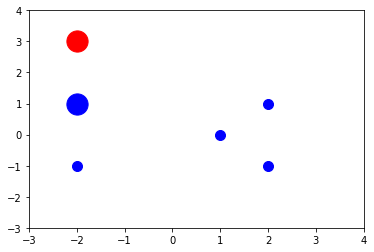

In [21]:
plt.figure()
plt.axis([-3, 4, -3, 4])
plt.scatter(M1.get_x(), M1.get_y(), c='red', s=450)
plt.scatter(M2.get_x(), M2.get_y(), c='blue', s=450)

# puis le claster 1 est vide je ne vais rien afficher pour ce claster
for c in claster_M2:
    plt.scatter(c.get_x(), c.get_y(), c='blue', s=100)

### Premier tour tous les points sont proche de M2

# Deuxième iteration

In [22]:
M11 = M1.moyenne(claster_M1)
M22 = M2.moyenne(claster_M2)

In [23]:
## mes nouveaux centres sont:
M11.decrire('M11')
M22.decrire('M22')

le M11 a pour cordonnées: x = -2.0, y = 3.0 
le M22 a pour cordonnées: x = 0.2, y = 0.0 


In [27]:
distanceM11M1 = M11.distance(M1)
distanceM11M2 = M11.distance(M2)
distanceM11M3 = M11.distance(points['M3']) 
distanceM11M4 = M11.distance(points['M4'])
distanceM11M5 = M11.distance(points['M5'])
distanceM11M6 = M11.distance(points['M6'])

In [28]:
distanceM22M1 = M22.distance(M1) 
distanceM22M2 = M22.distance(M2) 
distanceM22M3 = M22.distance(points['M3']) 
distanceM22M4 = M22.distance(points['M4'])
distanceM22M5 = M22.distance(points['M5'])
distanceM22M6 = M22.distance(points['M6'])

In [29]:
claster_M11 = []
claster_M22 = []

if distanceM11M1 < distanceM22M1:
    claster_M11.append(M1)
else:
    claster_M22.append(M1)

if distanceM11M2 < distanceM22M2:
    claster_M11.append(M2)
else:
    claster_M22.append(M2)
    
if distanceM11M3 < distanceM22M3:
    claster_M11.append(points['M3'])
else:
    claster_M22.append(points['M3'])
    
if distanceM11M4 < distanceM22M4:
    claster_M11.append(points['M4'])
else:
    claster_M22.append(points['M4'])
    
if distanceM11M5 < distanceM22M5:
    claster_M11.append(points['M5'])
else:
    claster_M22.append(points['M5'])
    
    
if distanceM11M6 < distanceM22M6:
    claster_M11.append(points['M6'])
else:
    claster_M22.append(points['M6'])


In [30]:
claster_M1.append(M1)
claster_M1

[<__main__.Point at 0x1623c51fb80>, <__main__.Point at 0x1623c51fb80>]

In [31]:
claster_M22.append(M22)
claster_M22

In [37]:
claster_M11.append(M1)

In [38]:
distanceM11M2

2.0

In [39]:
distanceM22M2

2.4166091947189146

In [40]:
distanceM1M3

4.0

In [41]:
distanceM22M3

2.4166091947189146

In [43]:
M222=M22.moyenne(claster_M22)
M11=M11.moyenne(claster_M11)

In [44]:
M222.decrire('M222')
M11.decrire('M11')

le M222 a pour cordonnées: x = 0.64, y = -0.2 
le M11 a pour cordonnées: x = -2.0, y = 2.5 


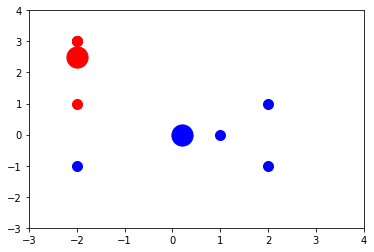

In [45]:
plt.figure()
plt.axis([-3, 4, -3, 4])
plt.scatter(M11.get_x(), M11.get_y(), c='red', s=450)
plt.scatter(M22.get_x(), M22.get_y(), c='blue', s=450)

# puis le claster 1 est vide je ne vais rien afficher pour ce claster
for c in claster_M11:
    plt.scatter(c.get_x(), c.get_y(), c='red', s=100)

# puis le claster 1 est vide je ne vais rien afficher pour ce claster
for c in claster_M22:
    plt.scatter(c.get_x(), c.get_y(), c='blue', s=100)
plt.show()

# Troisième Iteration

In [46]:
claster_M22.append(M22)
claster_M22.append(M11)

In [47]:
M222  = M22.moyenne(claster_M22)
M111 = M11.moyenne( claster_M11 )

In [48]:
# les nouveaux centres
M111.decrire('M111')
M222.decrire('M222')

le M111 a pour cordonnées: x = -2.0, y = 2.5 
le M222 a pour cordonnées: x = 0.20000000000000004, y = 0.21428571428571427 


In [49]:
distanceM111M11 = M11.distance(M11)
distanceM111M22 = M11.distance(M22)
distanceM111M1 = M11.distance(M1)
distanceM111M2 = M11.distance(M2)
distanceM111M3 = M11.distance(points['M3']) 
distanceM111M4 = M11.distance(points['M4'])
distanceM111M5 = M11.distance(points['M5'])
distanceM111M6 = M11.distance(points['M6'])

In [50]:
distanceM222M11 = M222.distance(M11) 
distanceM222M22 = M222.distance(M22)
distanceM222M1 = M222.distance(M1) 
distanceM222M2 = M222.distance(M2) 
distanceM222M3 = M222.distance(points['M3']) 
distanceM222M4 = M222.distance(points['M4'])
distanceM222M5 = M222.distance(points['M5'])
distanceM222M6 = M222.distance(points['M6'])

In [51]:
distanceM222M22

0.21428571428571427

In [52]:
distanceM111M22

3.3301651610693423

In [53]:
claster_M111 = []
claster_M222 = []

if distanceM111M1 < distanceM222M1:
    claster_M111.append(M1)
else:
    claster_M222.append(M1)

if distanceM111M2 < distanceM222M2:
    claster_M111.append(M2)
else:
    claster_M222.append(M2)
    
if distanceM111M2 < distanceM222M11:
    claster_M111.append(M11)
else:
    claster_M222.append(M11)
    
if distanceM111M22 < distanceM222M22:
    claster_M111.append(M22)
else:
    claster_M222.append(M22)
    
       
if distanceM111M3 < distanceM222M3:
    claster_M111.append(points['M3'])
else:
    claster_M222.append(points['M3'])
    
if distanceM111M4 < distanceM222M4:
    claster_M111.append(points['M4'])
else:
    claster_M222.append(points['M4'])
    
if distanceM111M5 < distanceM222M5:
    claster_M111.append(points['M5'])
else:
    claster_M222.append(points['M5'])
    
    
if distanceM111M6 < distanceM222M6:
    claster_M111.append(points['M6'])
else:
    claster_M222.append(points['M6'])


In [54]:
claster_M111

In [55]:
claster_M222

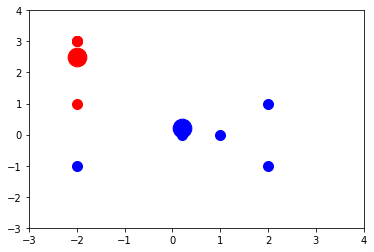

In [56]:
plt.figure()
plt.scatter(M11.get_x(), M11.get_y(), c='red', s=350)
plt.scatter(M222.get_x(), M222.get_y(), c='blue', s=350)
plt.axis([-3, 4, -3, 4])
for c in claster_M11:
    plt.scatter(c.get_x(), c.get_y(), c='red', s=100)

# puis le claster 1 est vide je ne vais rien afficher pour ce claster
for c in claster_M222:
    plt.scatter(c.get_x(), c.get_y(), c='blue', s=100)
plt.show()

### Je  pense c'est pas la peine de continuer cette iteration

In [58]:
# les cordonées des centres finaux
M111.decrire('M111')
M222.decrire('M222')

le M111 a pour cordonnées: x = -2.0, y = 2.5 
le M222 a pour cordonnées: x = 0.20000000000000004, y = 0.21428571428571427 
